In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load and Decsribe Data

In [2]:
df = pd.read_csv('../data/raw/train.csv',sep=';')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Detailed Column Description

**Bank client data:**
<br>
1. `age` (numeric)
2. `job` : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. `education` (categorical: "unknown","secondary","primary","tertiary")
5. `default`: has credit in default? (binary: "yes","no")
6. `balance`: average yearly balance, in euros (numeric)
7. `housing`: has housing loan? (binary: "yes","no")
8. `loan`: has personal loan? (binary: "yes","no")
<br>
**Related with the last contact of the current campaign:**
<br>
1. `contact`: contact communication type (categorical: "unknown","telephone","cellular")
2. `day`: last contact day of the month (numeric)
3. `month`: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
4. `duration`: last contact duration, in seconds (numeric)
<br>
**Other attributes:**
1. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
3. `previous`: number of contacts performed before this campaign and for this client (numeric)
4. `poutcome`: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
<br>
**Output variable (desired target):**<br>
`y` - has the client subscribed a term deposit? (binary: "yes","no")

## Numerical Data

In [4]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']

num_df = df.select_dtypes(include=num_dtypes)
numericals = num_df.columns

print(numericals)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [5]:
num_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


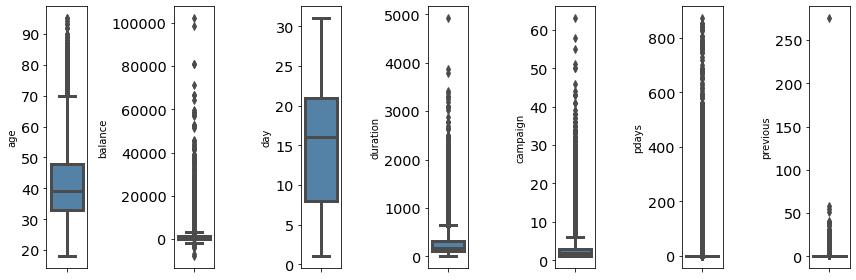

In [6]:
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='steelblue', orient='v')
    plt.tight_layout()

Almost all numerical data are not normally distributed.

## Categorical Data

In [7]:
cat_dtypes = ['object']

cat_df = df.select_dtypes(include=cat_dtypes)
categoricals = cat_df.columns

print(categoricals)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [8]:
cat_df.describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


`job` has many unique values and there is an 'unknown' value on `poutcome` which has the most number.

## Target Imbalance

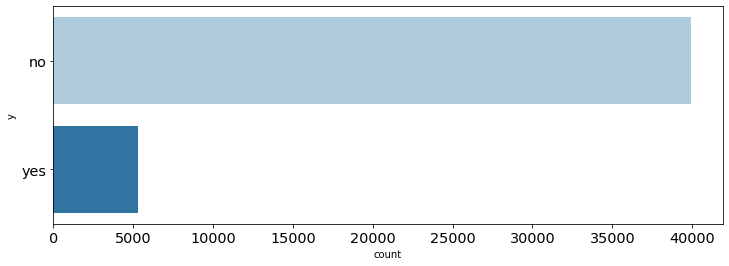

In [9]:
sns.countplot(data=df, y='y', palette='Paired');

Target is imbalance dominated by no value. This will affect the model in predicting the label.

# Data Analysis and Preparation

In [10]:
df_proc = df.copy()

## Missing Value

There is no missing value in every feature.

In [11]:
data_missing_value = df_proc.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,age,0
1,job,0
2,marital,0
3,education,0
4,default,0
5,balance,0
6,housing,0
7,loan,0
8,contact,0
9,day,0


## Duplicated Data

There is no duplicated data, each columns represent unique transaction from different customer.

In [12]:
df_proc.duplicated().any()

False

## Feature Engineering

### Grouping Job

`job` can be grouped into more general data so that the number of unique values is not too much.

In [13]:
list_jobgroup = []

for i, x in df.iterrows():
    if x['job'] == 'management':
        jobgroup = 'employee'
    elif x['job'] == 'technician':
        jobgroup = 'employee'
    elif x['job'] == 'admin.':
        jobgroup = 'employee'
    elif x['job'] == 'services':
        jobgroup = 'employee'      
    elif x['job'] == 'blue-collar':
        jobgroup = 'manual labor'
    elif x['job'] == 'housemaid':
        jobgroup = 'manual labor'
    elif x['job'] == 'self-employed':
        jobgroup = 'self-employed'
    elif x['job'] == 'entrepreneur':
        jobgroup = 'self-employed'
    elif x['job'] == 'retired':
        jobgroup = 'retired'
    elif x['job'] == 'student':
        jobgroup = 'student'
    elif x['job'] == 'unemployed':
        jobgroup = 'unemployed'
    else:
        jobgroup = 'unknown'
    list_jobgroup.append(jobgroup)

df_proc['job_group'] = list_jobgroup

### Handling unknown value

'unknown' value was found in `job_group`, `education`, `contact`, and `poutcome`.

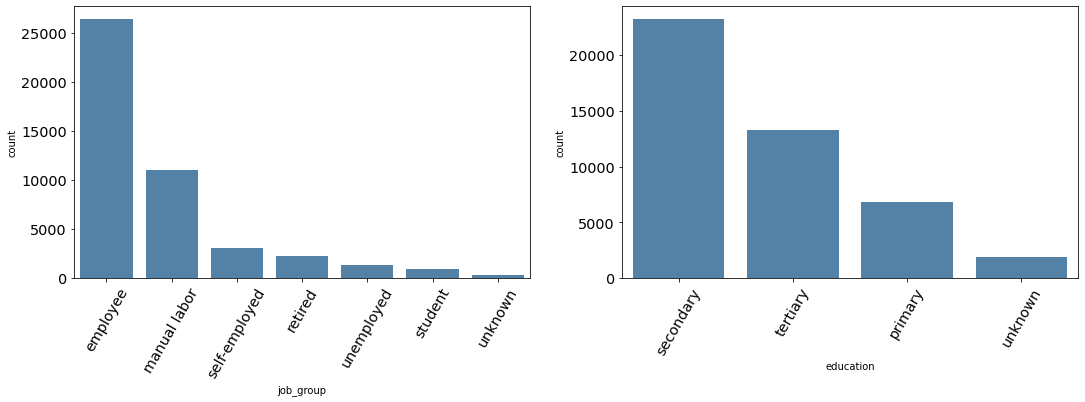

In [14]:
fig, ax = plt.subplots(1,2,figsize=(18, 5))

sns.countplot(data=df_proc, x='job_group', ax = ax[0], color='steelblue', order=df_proc["job_group"].value_counts().index).tick_params(axis='x', rotation=60)
sns.countplot(data=df_proc, x = 'education', ax = ax[1], color='steelblue', order=df_proc["education"].value_counts().index).tick_params(axis='x', rotation=60);

'unknown' value in `education` and `job_group` is less than 5%, so the value will be replaced with the mode to avoid bias.

In [15]:
df_proc['job_group'].replace(['unknown'],df_proc['job_group'].mode(),inplace = True)
df_proc['education'].replace(['unknown'],df_proc['education'].mode(),inplace = True)

'unknown' values in `contact` and `poutcome` have a large value, so replace it with mode might make the data speak differently. Here, can be assumed that 'unknown' in `contact` means that this customers have been exposed by campaign with another type of marketing such as email marketing, advertising, or digital marketing, without marketing team reach out personally to them. Whereas, 'unknown' values in `poutcome` can be assumed that customers never been exposed to another campaign before this campaign.

### Grouping Contact

'cellular' and 'telephone' can be grouped into 'phone' then processed with label encoding.

<AxesSubplot:xlabel='contact', ylabel='count'>

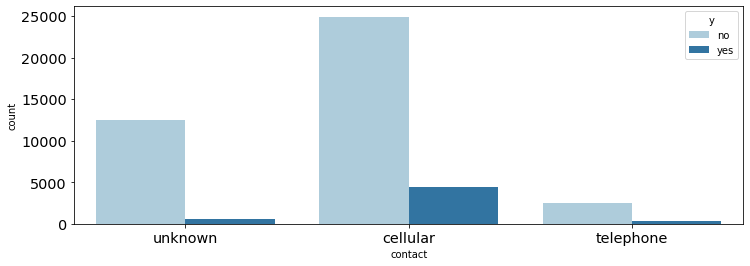

In [16]:
sns.countplot(data=df_proc, x='contact', hue = 'y', palette='Paired')

In [17]:
df_proc['contact_group']=df_proc['contact'].apply(lambda x: 'phone' if  (x == 'telephone' or x == 'cellular') else 'unknown')

### Remove invalid rows

If `poutcome` 'unknown' means the customers never exposed on other campaign, `pdays` must be -1 (client was not previously contacted). Also makes sure, that when `pdays` -1, values of `previous` is 0. Because the number of invalid data based on those rule are not many, the invalid data will be removed.

In [18]:
df_proc[(df_proc['poutcome']=='unknown') & (df_proc['pdays']!=-1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes,retired,phone
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no,employee,phone
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes,employee,phone
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no,employee,phone
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no,employee,phone


In [19]:
df_proc[(df_proc['pdays']==-1) & (df_proc['previous']!=0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,job_group,contact_group


In [20]:
df_proc = df_proc[ ~((df_proc['poutcome']=='unknown') & (df_proc['pdays']!=-1))]

### Change duration seconds to minutes

In [21]:
df_proc['duration'] = df_proc['duration']/60

In [22]:
df_vis = df_proc.copy()

### Label Encoding

`default`, `housing`, and `loan` are features with two values, 'yes' and 'no', label encoding will be performed in these features with feature `contact_group` which already been processed from feature `contact` before and target `y` which also has value 'yes' and 'no'.

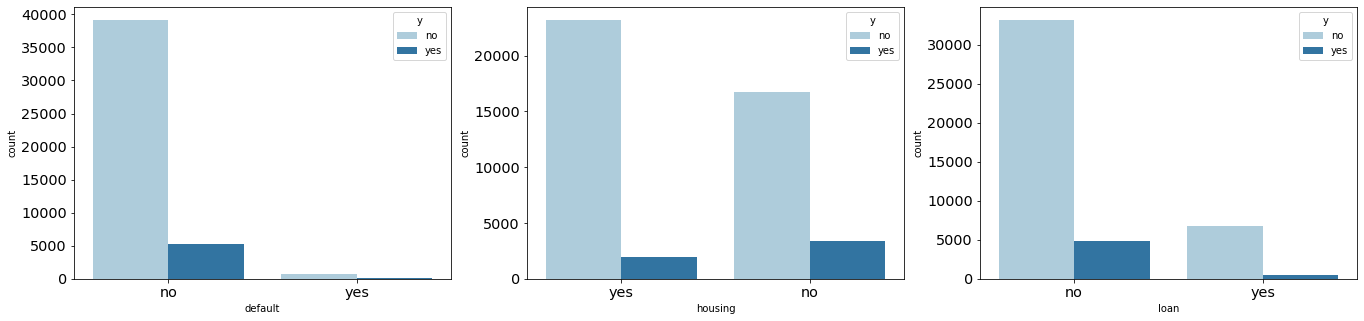

In [23]:
fig, ax = plt.subplots(1,3,figsize=(23, 5))

sns.countplot(data=df_proc, x='default', hue='y', ax = ax[0], palette='Paired')
sns.countplot(data=df_proc, x = 'housing', hue = 'y', ax = ax[1], palette='Paired')
sns.countplot(data=df_proc, x = 'loan', hue = 'y', ax = ax[2], palette='Paired');

In [24]:
df_proc['default'].replace('no', 0, inplace = True)
df_proc['default'].replace('yes', 1, inplace = True)
df_proc['housing'].replace('no', 0, inplace = True)
df_proc['housing'].replace('yes', 1, inplace = True)
df_proc['loan'].replace('no', 0, inplace = True)
df_proc['loan'].replace('yes', 1, inplace = True)
df_proc['contact_group'].replace('unknown', 0, inplace = True)
df_proc['contact_group'].replace('phone', 1, inplace = True)
df_proc['y'].replace('no', 0, inplace = True)
df_proc['y'].replace('yes', 1, inplace = True)

### One Hot Encoding

In [25]:
cats_oh = ['job_group','marital','education','poutcome']
for cat in cats_oh:
    onehots = pd.get_dummies(df_proc[cat], prefix=cat)
    df_proc = df_proc.join(onehots)

df_proc.drop(cats_oh, axis=1, inplace=True)
df_proc.sample(10,random_state=42)
df_proc.head(3)

,age,job,default,balance,housing,loan,contact,day,month,duration,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,0,2143,1,0,unknown,5,may,4.350000,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,0,29,1,0,unknown,5,may,2.516667,...,0,0,1,0,1,0,0,0,0,1
2,33,entrepreneur,0,2,1,1,unknown,5,may,1.266667,...,0,1,0,0,1,0,0,0,0,1


### Correlation

Text(0.5, 1.0, 'Features Correlation')

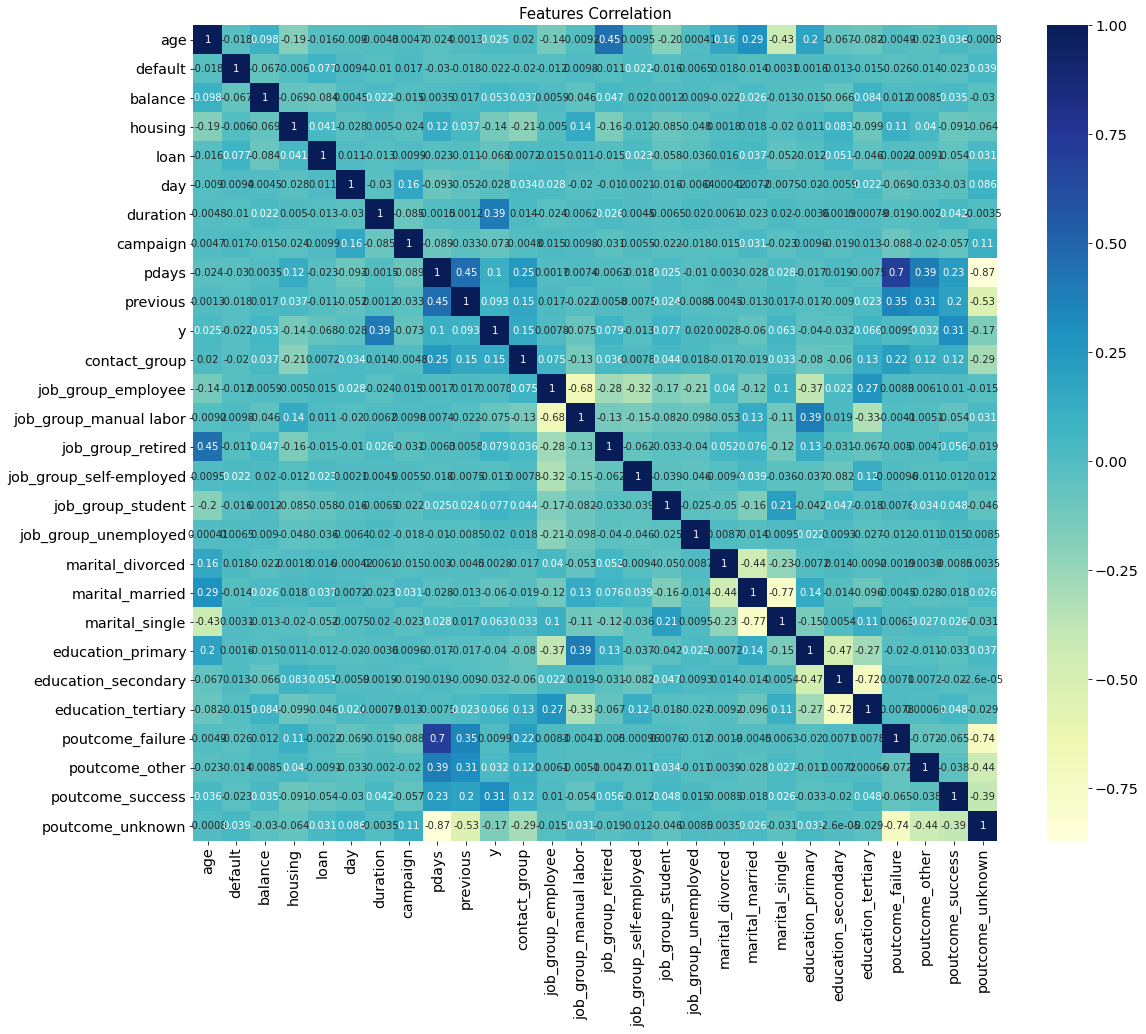

In [26]:
plt.figure(figsize = (18, 15))
sns.heatmap(df_proc.corr(), cmap = 'YlGnBu', annot = True)
plt.title("Features Correlation", fontsize = 15)

Features with strong correlation are `pdays` with `poutcome_unknown`, will drop `pdays` to prevent multicollinearity.

### Feature Selection

In [27]:
df_proc.drop(['job', 'contact', 'day', 'month', 'pdays'], axis=1, inplace=True)
df_proc.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'previous', 'y', 'contact_group', 'job_group_employee',
       'job_group_manual labor', 'job_group_retired',
       'job_group_self-employed', 'job_group_student', 'job_group_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [28]:
df_proc.describe()

,age,default,balance,housing,loan,duration,campaign,previous,y,contact_group,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,...,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000,45206.000000
mean,40.936469,0.018029,1362.331483,0.555855,0.160200,4.302552,2.763881,0.580012,0.116954,0.711985,...,0.115184,0.601933,0.282883,0.151551,0.554263,0.294187,0.108415,0.040703,0.033425,0.817458
std,10.618553,0.133056,3044.904583,0.496876,0.366795,4.291986,3.098164,2.303257,0.321368,0.452843,...,0.319247,0.489505,0.450405,0.358589,0.497052,0.455681,0.310907,0.197602,0.179745,0.386295
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,1.716667,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,5.316667,3.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,81.966667,63.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_proc.to_csv("../data/data_modeling.csv", index = False)
df_vis.to_csv("../data/data_visual.csv", index = False)